In [1]:
import janome
import wordcloud

Duplicate key in file PosixPath('/usr/local/lib/python3.8/dist-packages/matplotlib/mpl-data/matplotlibrc'), line 768 ('font.family: IPAexGothic')


In [2]:
text = """ロシアによるウクライナへの軍事侵攻が始まってから24日で5か月となります。
ウクライナとロシアはウクライナ産の小麦などの輸出再開に向けて合意しましたが、合意の翌日の23日、南部にある輸出拠点の港がミサイル攻撃を受け、今後、輸出が円滑に再開されるのか国際社会の注目が集まっています。

ロシアがウクライナへの軍事侵攻を開始してから24日で5か月となります。

ロシア軍は、ウクライナ東部で攻撃を続ける一方、ウクライナ軍も欧米から兵器の供与を受けながら抗戦を続けています。

長引く侵攻で輸出拠点となっている南部オデーサの港ではロシア軍による封鎖でウクライナ産の小麦などの輸出が滞っていましたが、ウクライナとロシアはトルコと国連の仲介のもとで22日、輸出再開に向けて合意しました。

"""

In [3]:
from janome.tokenizer import Tokenizer


In [4]:
tokener = Tokenizer()

In [20]:
tokenized = tokener.tokenize(text)
for tkn in tokenized:
    print(tkn.part_of_speech.split(","))

['名詞', '固有名詞', '地域', '国']
['助詞', '格助詞', '連語', '*']
['名詞', '固有名詞', '地域', '国']
['助詞', '格助詞', '一般', '*']
['助詞', '連体化', '*', '*']
['名詞', '一般', '*', '*']
['名詞', 'サ変接続', '*', '*']
['助詞', '格助詞', '一般', '*']
['動詞', '自立', '*', '*']
['助詞', '接続助詞', '*', '*']
['助詞', '格助詞', '一般', '*']
['名詞', '数', '*', '*']
['名詞', '接尾', '助数詞', '*']
['助詞', '格助詞', '一般', '*']
['名詞', '数', '*', '*']
['名詞', '接尾', '助数詞', '*']
['助詞', '格助詞', '一般', '*']
['動詞', '自立', '*', '*']
['助動詞', '*', '*', '*']
['記号', '句点', '*', '*']
['記号', '空白', '*', '*']
['名詞', '固有名詞', '地域', '国']
['助詞', '並立助詞', '*', '*']
['名詞', '固有名詞', '地域', '国']
['助詞', '係助詞', '*', '*']
['名詞', '固有名詞', '地域', '国']
['名詞', '接尾', '地域', '*']
['助詞', '連体化', '*', '*']
['名詞', '一般', '*', '*']
['助詞', '副助詞', '*', '*']
['助詞', '連体化', '*', '*']
['名詞', 'サ変接続', '*', '*']
['名詞', 'サ変接続', '*', '*']
['助詞', '格助詞', '一般', '*']
['動詞', '自立', '*', '*']
['助詞', '接続助詞', '*', '*']
['名詞', 'サ変接続', '*', '*']
['動詞', '自立', '*', '*']
['助動詞', '*', '*', '*']
['助動詞', '*', '*', '*']
['助詞', '接続助詞', '*', '*']
['記号

In [10]:
from janome.analyzer import Analyzer
from janome.charfilter import UnicodeNormalizeCharFilter, RegexReplaceCharFilter
from janome.tokenfilter import POSKeepFilter, LowerCaseFilter, ExtractAttributeFilter

char_filters = [UnicodeNormalizeCharFilter(),
                RegexReplaceCharFilter('<.*?>', '')]

token_filters = [POSKeepFilter(['名詞']),
                 LowerCaseFilter(),
                 ExtractAttributeFilter('base_form')]

alz = Analyzer(char_filters=char_filters, tokenizer=tokener, token_filters=token_filters)
for tkn in alz.analyze(text):
    print(tkn)


ロシア
ウクライナ
軍事
侵攻
24
日
5
か月
ウクライナ
ロシア
ウクライナ
産
小麦
輸出
再開
合意
合意
翌日
23
日
南部
輸出
拠点
港
ミサイル
攻撃
今後
輸出
円滑
再開
の
国際
社会
注目
ロシア
ウクライナ
軍事
侵攻
開始
24
日
5
か月
ロシア
軍
ウクライナ
東部
攻撃
一方
ウクライナ
軍
欧米
兵器
供与
抗戦
侵攻
輸出
拠点
南部
オデーサ
港
ロシア
軍
封鎖
ウクライナ
産
小麦
輸出
ウクライナ
ロシア
トルコ
国連
仲介
もと
22
日
輸出
再開
合意


In [21]:
import collections

word_counts = collections.Counter(alz.analyze(text))
isinstance(word_counts, dict)


True

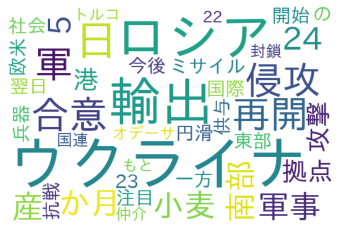

In [15]:
from __future__ import annotations

from wordcloud import WordCloud
from matplotlib import pyplot

font_path = "/usr/share/fonts/opentype/ipaexfont-gothic/ipaexg.ttf"

params = dict(
    background_color="white",
    font_path=font_path,
    width=600,
    height=400,
    min_font_size=15
)
wc = WordCloud(**params)
wc.generate_from_frequencies(word_counts)

pyplot.imshow(wc)
pyplot.axis("off")
pyplot.show()
